<a href="https://colab.research.google.com/github/AntonyanKosterko/best_hack_bpa/blob/main/best_hack_bpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Чтение JSON-файла в DataFrame
df = pd.read_json('dataset_hack.json')


In [4]:
df

,id,message,user_id,channel_id,create_at,update_at,root_id,edit_at,delete_at,is_pinned,original_id
0,146090,Привет! Покупателю 473905 не возвращаются день...,261636,897391,2023-08-29 22:03:17.662,2023-08-29 22:03:17.662,None,0,0,False,
1,146099,Привет! Покупателю 310597 не возвращаются день...,205592,347308,2023-08-29 23:52:18.227,2023-08-29 23:52:18.227,None,0,0,False,
2,146104,"Добрый день, в профиле 528509 не отображается ...",178096,250509,2023-08-30 01:00:56.713,2023-08-30 01:00:56.713,None,0,0,False,
3,146111,Привет! У клиента 804993 несколько вопросов ка...,255493,69518,2023-08-30 02:29:30.042,2023-08-30 02:29:30.042,None,0,0,False,
4,146118,Привет! У клиента 746656 несколько вопросов ка...,660691,52200,2023-08-30 04:15:40.920,2023-08-30 04:15:40.920,dsyhsescphovx9o0jktmy0zt,0,0,False,
...,...,...,...,...,...,...,...,...,...,...,...
4995,173586,Привет! Пользователь 854633 просит убрать увед...,291100,513624,2024-03-19 01:09:34.554,2024-03-19 01:09:34.554,lun6ec3wk09wcrk07yro1xqt,0,0,False,
4996,173590,Привет! Продавец 357850 просит убрать уведомле...,241531,416648,2024-03-19 02:01:59.983,2024-03-19 02:01:59.983,None,0,0,False,
4997,173599,"Привет! Была выплачена компенсация №286603, ну...",344626,350072,2024-03-19 03:01:26.888,2024-03-19 03:01:26.888,None,0,0,False,
4998,173607,Привет! У клиента 785331 несколько вопросов ка...,28495,76680,2024-03-19 04:36:23.292,2024-03-19 04:36:23.292,2lo1chn8z3ug2jjpros3vuct,0,0,False,


In [5]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [6]:
pip install nltk

In [7]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...


In [13]:
from sentence_transformers import SentenceTransformer
import scipy.spatial
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Предварительная обработка текстов
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Токенизация
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Лемматизация
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Объединение токенов обратно в строку
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Загрузка предобученной модели DistilBERT
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Пример текстов
texts = df['message']

# Преобразование и предварительная обработка текстов
preprocessed_texts = [preprocess_text(text) for text in texts]

# Преобразование текстов в эмбеддинги
embeddings = model.encode(preprocessed_texts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

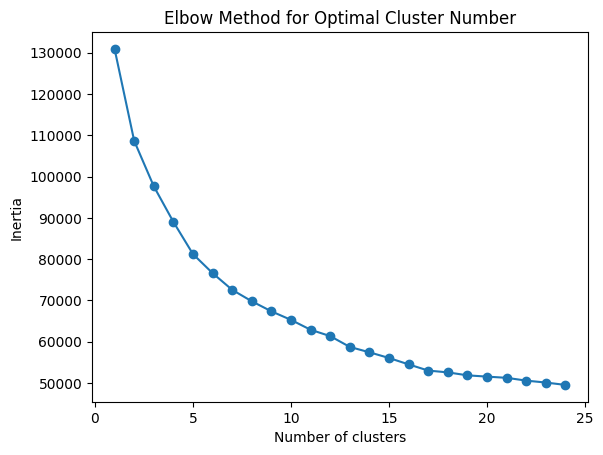

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Перебор количества кластеров
max_clusters = 24
inertias = []
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

# Визуализация метода локтя
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

In [ ]:
clusters = kmeans.labels_
# Вывод текстов в каждом кластере
for cluster_id in range(num_clusters):
    cluster_texts = [texts[i] for i, cluster_label in enumerate(clusters) if cluster_label == cluster_id]
    print(f"Cluster {cluster_id}:")
    for text in cluster_texts:
        print(text)
    print()

In [19]:
kmeans = KMeans(n_clusters=24)
kmeans.fit(embeddings)

text = df['message'][4531]
# print(text, end='\n')

preprocessed_text = preprocess_text(text)
embedding = model.encode([preprocessed_text])

# Определение кластера для нового текста
cluster_id = kmeans.predict(embedding)[0]

print(f"Cluster ID for the new text '{text}': {cluster_id}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster ID for the new text 'Привет! У клиента 636624 несколько вопросов касаемо доставки (DBS и RDBS) и API, можете подсказать по ним ответы или может подскажете кому их можно направить? Подробности в треде.': 6
